## Simulating genotype-phenotype map with high-order epistasis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import from epistasis.simulate module
from epistasis.simulate.additive import AdditiveSimulation

### Additive epistasis

Construct an additive, binary dataset using the `quick_start` method.

In [2]:
space = AdditiveSimulation.quick_start(6,6)

Add noise to the data by sampling pseudo-replicates. 

/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/core/_methods.py:114: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


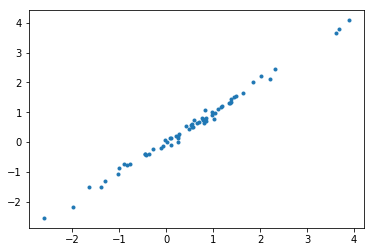

In [3]:
space.set_stdeviations(0.1)
sample = space.sample(1)
samplegpm = sample.get_gpm()

# Correlation plot between samples and actual phenotypes
plt.plot(space.phenotypes ,samplegpm.phenotypes, '.')

### Multiplicative epistasis

In [4]:
# Import from epistasis.simulate module
from epistasis.simulate.multiplicative import MultiplicativeSimulation

Construct multiplicative, binary dataset using the `quick_start` method.

In [5]:
space = MultiplicativeSimulation.quick_start(6,6)

Add noise to the data by sampling pseudo-replicates. 

/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/core/_methods.py:114: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


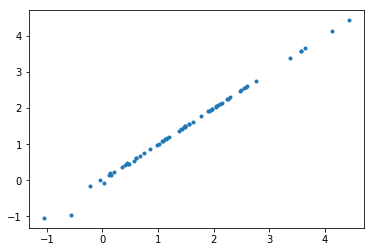

In [6]:
space.set_stdeviations(0.1)
sample = space.sample(1)
samplegpm = sample.get_gpm()

# Correlation plot between samples and actual phenotypes
plt.plot(space.log.phenotypes, samplegpm.log.phenotypes, '.')

### NK Epistasis 

In [7]:
# Import from epistasis.simulate module
from epistasis.simulate.nk import NkSimulation

Construct multiplicative, binary dataset using the `quick_start` method.

In [8]:
space = NkSimulation.quick_start(6,6)

Add noise to the data by sampling pseudo-replicates. 

/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/core/_methods.py:114: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


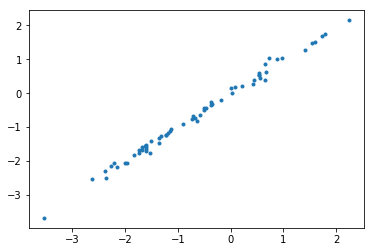

In [9]:
space.set_stdeviations(0.1)
sample = space.sample(1)
samplegpm = sample.get_gpm()

# Correlation plot between samples and actual phenotypes
plt.plot(space.phenotypes, samplegpm.phenotypes, '.')

## Nonlinear Epistasis

In [10]:
from epistasis.simulate import NonlinearSimulation

In [15]:
def saturation(x, K):
    return ((K+1)*x)/(K*x + 1)

In [38]:
wildtype = "00000"
mutations = dict([(i, ["0","1"]) for i in range(5)])
order = 5

betas = -2 * np.random.random(size=32) + 1
betas[0] = .5
betas[1:6] = betas[1:6] * .1
betas[6:] = betas[6:] * .01

linear = AdditiveSimulation.from_epistasis(wildtype,
    mutations,
    order,                                       
    betas,
    model_type="global"
)

In [39]:
space = NonlinearSimulation.from_linear(linear, function=saturation, p0=[5])

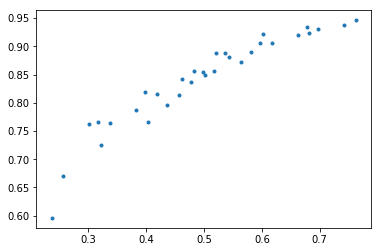

In [40]:
plt.plot(space.linear.p_additive, space.phenotypes, '.')

In [41]:
def boxcox(x, lmbda1,lmbda2):
    """Box Cox transformation"""
    return ((x-lmbda2)**lmbda1 - 1 )/lmbda1

In [42]:
import scipy

In [43]:
def power_transform(x, lmbda, A, B):
    """Power transformation function."""
    gmean = scipy.stats.mstats.gmean(x + A)
    if lmbda == 0:
        return gmean*numpy.log(x+A)
    else:
        first = (x+A)**lmbda
        out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B
        return out

In [44]:
from epistasis.models import NonlinearEpistasisModel

In [45]:
model = NonlinearEpistasisModel.from_gpm(space, order=1, function=power_transform, model_type="global")

/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


R-squared of fit: 0.968110698781
A: -0.392608591158
B: 1.20156063806
lmbda: 0.458377600371


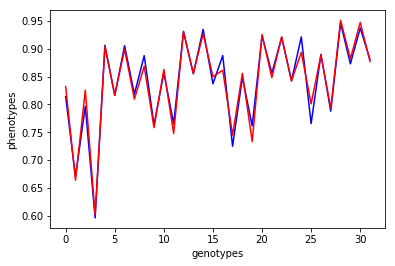

In [46]:
model.fit_widget(lmbda=(-5,5,.1), A=(-5,5,.1), B=(-5,5,.1))

TypeError: 'LinearEpistasisRegression' object is not callable

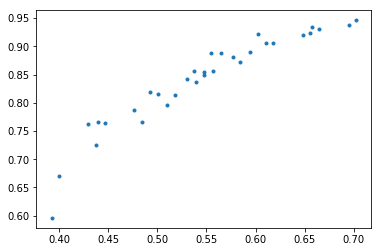

In [47]:
model.plot.best_fit()